In [2]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from keras.layers import Dense, Input, Flatten
from keras.layers import Reshape, Dropout, Concatenate
from keras.layers import Conv2D, MaxPool2D, Embedding
from keras.models import Model
import os
import json
from json2html import *
from IPython.core.display import display, HTML
from tqdm import tqdm_notebook
%matplotlib inline
#nltk.download('wordnet')

Using TensorFlow backend.


In [2]:
# Directories:
GLOVE_DIR="D:\GitRepos\Datasets\glove6B"

In [3]:
print(os.getcwd())
with open(os.getcwd()+'\data\\train.json',encoding="utf8") as f:
   data = json.load(f)


D:\ML Projects\DeepLearning_Coding_Task\NLU


In [ ]:
# with open(os.getcwd()+'\data\\dev.json',encoding="utf8") as f:
#    dev = json.load(f)

In [4]:
VALIDATION_SPLIT=0.10
MAX_NB_WORDS=20000
EMBEDDING_DIM = 100 # Dimensions of Glove word vectors

In [8]:
df = pd.DataFrame(data)


In [7]:
# #df = df.T
# table=df.to_html()
# with open("Data.html", "w", encoding="utf-8") as file:
#     file.write(table)

,0,1,2,3,4,5,6,7,8,9,...,10087,10088,10089,10090,10091,10092,10093,10094,10095,10096
intent,AddToPlaylist,AddToPlaylist,AddToPlaylist,AddToPlaylist,AddToPlaylist,AddToPlaylist,AddToPlaylist,AddToPlaylist,AddToPlaylist,AddToPlaylist,...,SearchScreeningEvent,SearchScreeningEvent,SearchScreeningEvent,SearchScreeningEvent,SearchScreeningEvent,SearchScreeningEvent,SearchScreeningEvent,SearchScreeningEvent,SearchScreeningEvent,SearchScreeningEvent
text,Add a tune to my elrow Guest List,Add a guy is a guy to the infinite indie folk ...,Put hampartsoum limondjian in running to rock ...,Add Recalled to Life to This Is Alejandro Fern...,Add Bronislau Kaper to the drive playlist.,add this song by George Melly to my 90's Baby ...,add 157 Riverside Avenue to leticia's animal h...,add the name covenant to the playlist Fusion Fest,Add Live from Aragon Ballroom to Trapeo,add the song to the Dub On The Beach playlist,...,Find the movie schedule for animated movies in...,is Transcending Fear at Malco Theatres,Please give me the movie schedules.,what's the closest cinema showing animated movies,Is Proudly She Marches playing anywhere?,I'd like to watch The Freckled Fish at 00:47:4...,Which films are playing at the closest movie h...,show movie times for AMC Theatres,What time is Do Sher playing,What is the movie schedule for films that are ...
slots,"{'music_item': 'tune', 'playlist_owner': 'my',...","{'entity_name': 'a guy is a guy', 'playlist': ...","{'artist': 'hampartsoum limondjian', 'playlist...","{'entity_name': 'Recalled to Life', 'playlist'...","{'artist': 'Bronislau Kaper', 'playlist': 'dri...","{'music_item': 'song', 'artist': 'George Melly...","{'entity_name': '157 Riverside Avenue', 'playl...","{'entity_name': 'covenant', 'playlist': 'Fusio...","{'entity_name': 'Live from Aragon Ballroom', '...","{'music_item': 'song', 'playlist': 'Dub On The...",...,"{'object_type': 'movie schedule', 'movie_type'...","{'movie_name': 'Transcending Fear', 'location_...",{'object_type': 'movie schedules'},"{'spatial_relation': 'closest', 'object_locati...",{'movie_name': 'Proudly She Marches'},"{'movie_name': 'The Freckled Fish', 'timeRange...","{'movie_type': 'films', 'spatial_relation': 'c...","{'object_type': 'movie times', 'location_name'...",{'movie_name': 'Do Sher'},"{'object_type': 'movie schedule', 'movie_type'..."
positions,"{'music_item': [6, 9], 'playlist_owner': [14, ...","{'entity_name': [4, 17], 'playlist': [26, 44]}","{'artist': [4, 25], 'playlist': [30, 59]}","{'entity_name': [4, 19], 'playlist': [24, 50]}","{'artist': [4, 18], 'playlist': [27, 31]}","{'music_item': [9, 12], 'artist': [17, 28], 'p...","{'entity_name': [4, 23], 'playlist_owner': [28...","{'entity_name': [13, 20], 'playlist': [38, 48]}","{'entity_name': [4, 28], 'playlist': [33, 38]}","{'music_item': [8, 11], 'playlist': [20, 35]}",...,"{'object_type': [9, 22], 'movie_type': [28, 42...","{'movie_name': [3, 19], 'location_name': [24, ...","{'object_type': [19, 33]}","{'spatial_relation': [11, 17], 'object_locatio...","{'movie_name': [3, 21]}","{'movie_name': [18, 34], 'timeRange': [39, 46]...","{'movie_type': [6, 10], 'spatial_relation': [3...","{'object_type': [5, 15], 'location_name': [21,...","{'movie_name': [13, 19]}","{'object_type': [12, 25], 'movie_type': [31, 3..."


In [ ]:
#display(HTML(json2html.convert(json = data)))

In [ ]:
#html =  json2html.convert(json = data)
#f = open('tabular_data.html','w',encoding="utf-8")
#f.write(html)

In [9]:
dfT=df.T
#dfT.loc['intent']
dfT.head()

,intent,text,slots,positions
0,AddToPlaylist,Add a tune to my elrow Guest List,"{'music_item': 'tune', 'playlist_owner': 'my',...","{'music_item': [6, 9], 'playlist_owner': [14, ..."
1,AddToPlaylist,Add a guy is a guy to the infinite indie folk ...,"{'entity_name': 'a guy is a guy', 'playlist': ...","{'entity_name': [4, 17], 'playlist': [26, 44]}"
2,AddToPlaylist,Put hampartsoum limondjian in running to rock ...,"{'artist': 'hampartsoum limondjian', 'playlist...","{'artist': [4, 25], 'playlist': [30, 59]}"
3,AddToPlaylist,Add Recalled to Life to This Is Alejandro Fern...,"{'entity_name': 'Recalled to Life', 'playlist'...","{'entity_name': [4, 19], 'playlist': [24, 50]}"
4,AddToPlaylist,Add Bronislau Kaper to the drive playlist.,"{'artist': 'Bronislau Kaper', 'playlist': 'dri...","{'artist': [4, 18], 'playlist': [27, 31]}"


In [10]:
dfT.columns

Index(['intent', 'text', 'slots', 'positions'], dtype='object')

In [11]:
intentList = dfT[['text','intent']]

In [ ]:
# html =  json2html.convert(json = intentList.to_json(orient='records'))
# f = open('intent.html','w',encoding="utf-8")
# f.write(html)

<h3> Create Training and Testing Split </h3>

In [12]:
train=intentList[0:0]
test=train
intentNames = intentList['intent'].unique()
intentIdx = []
for i in intentNames:
    idx=int(intentList.intent.ne(i).idxmin())
    intentIdx.append(idx)


intentIdx.append(len(intentList)-1) # add the last index


for i in range(len(intentIdx)-1):
    totalIntents = intentIdx[i+1]-intentIdx[i]
    lastIdx = intentIdx[i]+round(totalIntents*(1-VALIDATION_SPLIT))
    train=train.append(intentList[intentIdx[i]:lastIdx],ignore_index = True) #ignore_index creates a new indexing upon append
    test=test.append(intentList[lastIdx:intentIdx[i+1]],ignore_index = True)
    
split_index = len(train)    #index at which the dataset needs to be split: For later use
intentList1= train.append(test)
    
    

In [16]:
print(intentList['intent'].value_counts())

GetWeather              1463
PlayMusic               1462
SearchCreativeWork      1438
SearchScreeningEvent    1437
RateBook                1436
BookRestaurant          1433
AddToPlaylist           1428
Name: intent, dtype: int64


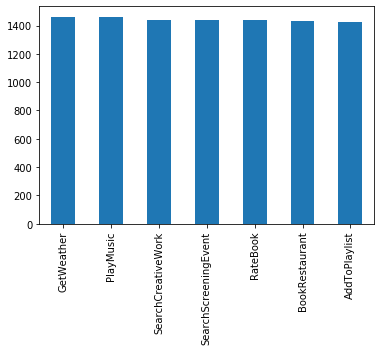

In [17]:
fig, ax = plt.subplots()
intentList['intent'].value_counts().plot(ax=ax, kind='bar')

<h3>Stem or Lemmatize</h3>

In [18]:
cleanList = intentList1.copy()

In [20]:
# tokenizer = nltk.tokenize.TreebankWordTokenizer()
# lemmatizer = WordNetLemmatizer()
# vectorizer = CountVectorizer()

# for index, row in tqdm_notebook(cleanList.iterrows()):
#     text=row['text']
#     tokens = tokenizer.tokenize(text)
#     s = []
#     for token in tokens:
#         s.append(lemmatizer.lemmatize(token))
#     sentence_vectors = vectorizer.fit_transform(s)
#     row['text']=sentence_vectors.toarray()

<h2> Keras Implementation </h3>

In [21]:
from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [22]:
texts=intentList1['text'].tolist()
intents=intentList1['intent'].tolist()

In [23]:
le = preprocessing.LabelEncoder()
le.fit(intents)
labels = le.transform(intents)
label_dict = dict(zip(list(le.classes_), le.transform(list(le.classes_))))
label_list=pd.DataFrame.from_dict(label_dict, orient='index',columns=['Label'])
label_list

Labels: [0 0 0 ... 6 6 6]


,Label
AddToPlaylist,0
BookRestaurant,1
GetWeather,2
PlayMusic,3
RateBook,4
SearchCreativeWork,5
SearchScreeningEvent,6


In [25]:
MAX_SEQUENCE_LENGTH=0
for i in texts:
    l=len(i.split())
    if l>MAX_SEQUENCE_LENGTH:
        MAX_SEQUENCE_LENGTH=l

In [26]:
lemmatized_text=texts

for i in texts:
    j=0
    s=""
    t = i.split(" ")
    for word in t:
        #print(word+" : "+lemmatizer.lemmatize(word))
        s+=lemmatizer.lemmatize(word)+" "
    lemmatized_text[j]=s
    j+=1    

In [27]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenized_text=tokenizer.fit_on_texts(lemmatized_text)
sequences = tokenizer.texts_to_sequences(lemmatized_text)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9587 unique tokens.


In [28]:
lbl = to_categorical(np.asarray(labels))

In [1]:
lbl

NameError: name 'lbl' is not defined

In [29]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = to_categorical(np.asarray(labels)) #Convert to One-hot representation
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

train_x = data[:split_index]
train_y = labels[:split_index]

test_x = data[split_index:]
test_y = labels[split_index:]


print('Preparing embedding matrix.')

Found 9587 unique tokens.
Shape of data tensor: (10096, 35)
Shape of label tensor: (10096, 7)
Preparing embedding matrix.


In [ ]:
#print(test_x)
#print(test_y)
#print(train_x)
#print(train_y)

<h3> Creating Word Embeddings from GloVe data </h3>

In [30]:
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'), encoding="utf8")
for line in tqdm_notebook(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

c:\python37\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



Found 400000 word vectors.


In [31]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector


In [32]:
filter_sizes = [2,3,5]
num_filters = 512
drop = 0.5

print("Creating Model...")
inputs = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding = Embedding(input_dim=len(word_index) + 1, output_dim=EMBEDDING_DIM, weights=[embedding_matrix],
                      input_length=MAX_SEQUENCE_LENGTH, trainable=False)(inputs)
reshape = Reshape((MAX_SEQUENCE_LENGTH,EMBEDDING_DIM,1))(embedding)

conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], EMBEDDING_DIM), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], EMBEDDING_DIM), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], EMBEDDING_DIM), padding='valid', kernel_initializer='normal', activation='relu')(reshape)

maxpool_0 = MaxPool2D(pool_size=(MAX_SEQUENCE_LENGTH - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv_0)
maxpool_1 = MaxPool2D(pool_size=(MAX_SEQUENCE_LENGTH - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')(conv_1)
maxpool_2 = MaxPool2D(pool_size=(MAX_SEQUENCE_LENGTH - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')(conv_2)

concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)
dropout = Dropout(drop)(flatten)
preds = Dense(len(label_dict), activation='softmax')(dropout)

# this creates a model that includes inputs and outputs
model = Model(inputs=inputs, outputs=preds)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

model.summary()

Creating Model...
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 35, 100)      958800      input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 35, 100, 1)   0           embedding_1[0][0]                
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 34, 1, 512)   102912      reshape_1[0][0]                  
__________________________________________________________________________

In [34]:
history = model.fit(train_x, train_y,
          batch_size=64,
          epochs=10,
          validation_data=(test_x, test_y))

Train on 9086 samples, validate on 1010 samples
Epoch 1/10
9086/9086 [==============================] - 29s 3ms/step - loss: 0.3097 - acc: 0.8992 - val_loss: 0.0897 - val_acc: 0.9733
Epoch 2/10
9086/9086 [==============================] - 12s 1ms/step - loss: 0.0732 - acc: 0.9799 - val_loss: 0.0719 - val_acc: 0.9762
Epoch 3/10
9086/9086 [==============================] - 12s 1ms/step - loss: 0.0421 - acc: 0.9879 - val_loss: 0.0537 - val_acc: 0.9822
Epoch 4/10
9086/9086 [==============================] - 12s 1ms/step - loss: 0.0283 - acc: 0.9928 - val_loss: 0.0603 - val_acc: 0.9802
Epoch 5/10
9086/9086 [==============================] - 13s 1ms/step - loss: 0.0196 - acc: 0.9950 - val_loss: 0.0548 - val_acc: 0.9851
Epoch 6/10
9086/9086 [==============================] - 12s 1ms/step - loss: 0.0123 - acc: 0.9976 - val_loss: 0.0483 - val_acc: 0.9842
Epoch 7/10
9086/9086 [==============================] - 12s 1ms/step - loss: 0.0093 - acc: 0.9986 - val_loss: 0.0553 - val_acc: 0.9822
Epoch 8

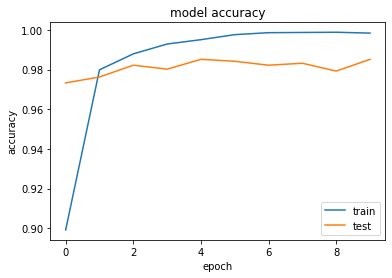

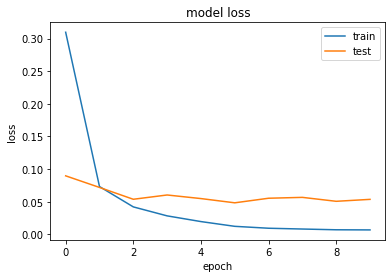

In [35]:

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()